<a href="https://colab.research.google.com/github/mikhooo/StudyCase02/blob/main/Study_Case_Data_Mining_%26_BI_Kelompok_E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**KELOMPOK E**



1.   Andini Assyahidah (2006571040) 
2.   Auranissa Efrida P (2006571192)
3.   Inez Aurellia R (2006571204)
4.   Laily Nur Azizah (2006464234)
5.   Kamilia Firzanah (2006526144)
6.   Kesia Gabriele (2006464013)
7.   Raafi Putri Ramadhani Salamah (2006570952)
8.   Yasmin Khairunnisa (2006571091)
9.   Rifka Amalia (2006528061)

##**Problem Statement**
Cabang sekarang : Jakarta, Depok, Tangerang
1. Rencananya MixITup ingin "scale" business-nya ke kota lain dan melakukan massive marketing.
2. Dapat pendanaan 33 Milyar






##**Data Cleaning, Pre-Processing**



In [ ]:
#import module yang dibutuhkan
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mikhooo/StudyCase02/main/Case-Study-02-MixITup_final3.csv')
df.head()

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49.0,13114754.0,52,1.0,Jakarta,1.0,Sabtu,2
1,102,Wanita,32.0,33606557.0,86,1.0,Depok,1.0,Minggu,6
2,103,Pria,51.0,15983606.0,41,1.0,Jakarta,2.0,Minggu,3
3,104,Pria,19.0,12704918.0,55,0.0,Jakarta,1.0,Rabu,7
4,105,Wanita,38.0,20081967.0,42,1.0,Jakarta,2.0,Senin,8


In [ ]:
df.shape

(200, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    float64
 3   Pendapatan-per-bulan  200 non-null    float64
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    float64
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 15.8+ KB


In [ ]:
#Missing values computation
df.isnull().sum()

ID                       0
Jenis Kelamin            4
Umur                     0
Pendapatan-per-bulan     0
skor-pengeluaran         0
Menikah                 12
Kota                     0
Promo                    6
HariFav                  0
FavFlavor                0
dtype: int64

In [ ]:
df['Menikah'] = df['Menikah'].fillna(0)
df['Promo'] = df['Promo'].fillna(0)
#To remove the NA values (Jenis Kelamin)
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    196 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  196 non-null    float64
 3   Pendapatan-per-bulan  196 non-null    float64
 4   skor-pengeluaran      196 non-null    int64  
 5   Menikah               196 non-null    float64
 6   Kota                  196 non-null    object 
 7   Promo                 196 non-null    float64
 8   HariFav               196 non-null    object 
 9   FavFlavor             196 non-null    int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 16.8+ KB


In [ ]:
##dropkolom yang tidak berguna
df.drop('ID', axis=1, inplace = True)
df.head()

,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,Wanita,49.0,13114754.0,52,1.0,Jakarta,1.0,Sabtu,2
1,Wanita,32.0,33606557.0,86,1.0,Depok,1.0,Minggu,6
2,Pria,51.0,15983606.0,41,1.0,Jakarta,2.0,Minggu,3
3,Pria,19.0,12704918.0,55,0.0,Jakarta,1.0,Rabu,7
4,Wanita,38.0,20081967.0,42,1.0,Jakarta,2.0,Senin,8


In [ ]:
df['Menikah'].value_counts()

1.0    156
0.0     40
Name: Menikah, dtype: int64

In [ ]:
df['HariFav'].value_counts()

Senin     66
Sabtu     53
Minggu    40
Selasa    21
Kamis      6
Rabu       5
Jumat      5
Name: HariFav, dtype: int64

In [ ]:
df['Kota'].replace(['JJakarta'],['Jakarta'],inplace=True) #Noise

In [ ]:
df['Kota'].value_counts()

Jakarta      86
Depok        59
Tangerang    51
Name: Kota, dtype: int64

In [ ]:
df['Umur'].replace(["35'"],[35],inplace=True) #Noise

In [ ]:
df['Umur'].value_counts()

32.0    11
35.0     9
19.0     8
31.0     8
30.0     7
47.0     7
38.0     6
50.0     6
27.0     6
40.0     6
48.0     6
23.0     6
49.0     5
29.0     5
54.0     5
34.0     5
20.0     5
36.0     5
21.0     5
24.0     4
43.0     4
45.0     4
46.0     4
28.0     4
59.0     4
18.0     3
52.0     3
51.0     3
42.0     3
33.0     3
25.0     3
53.0     3
37.0     3
60.0     3
58.0     3
22.0     3
39.0     3
44.0     3
57.0     3
41.0     2
55.0     2
56.0     2
26.0     2
2.0      1
Name: Umur, dtype: int64

In [ ]:
df['Jenis Kelamin'].value_counts()

Wanita    109
Pria       86
-           1
Name: Jenis Kelamin, dtype: int64

In [ ]:
n=194
for i in range (n):
  if df['Jenis Kelamin'].values[i] == "-":
    print(i)

181


In [ ]:
df.drop(df.index[181],inplace=True)

In [ ]:
df['Jenis Kelamin'].value_counts()

Wanita    109
Pria       86
Name: Jenis Kelamin, dtype: int64

#**Exploratory Data Analysis**

In [ ]:
df.describe()

,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Promo,FavFlavor
count,195.000000,1.950000e+02,195.000000,195.00000,195.000000,195.000000
mean,37.266667,1.876839e+07,50.692308,0.80000,1.620513,3.610256
std,12.001317,1.077041e+07,26.094351,0.40103,0.999789,2.745549
min,2.000000,0.000000e+00,1.000000,0.00000,0.000000,0.000000
25%,28.500000,1.106557e+07,35.000000,1.00000,1.000000,1.000000
50%,36.000000,1.926230e+07,50.000000,1.00000,1.000000,4.000000
75%,47.000000,2.581967e+07,73.000000,1.00000,2.500000,6.000000
max,60.000000,5.000000e+07,101.000000,1.00000,5.000000,9.000000


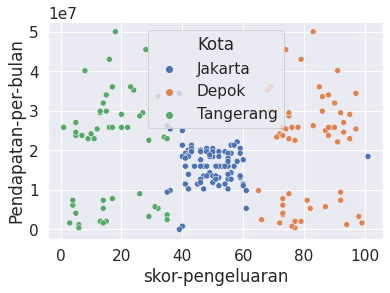

In [ ]:
#Checking Distribution
sns.scatterplot(data=df, y="Pendapatan-per-bulan",x="skor-pengeluaran",hue="Kota")
df = df.astype({"Pendapatan-per-bulan": int, "skor-pengeluaran": int}) #change dtype of columns into int


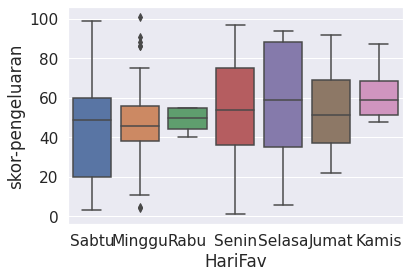

In [ ]:
#ingin dilihat apakah ada kecenderungan pengeluaran customer di hari-hari tertentu.
sns.boxplot(y='skor-pengeluaran', x='HariFav', data=df)

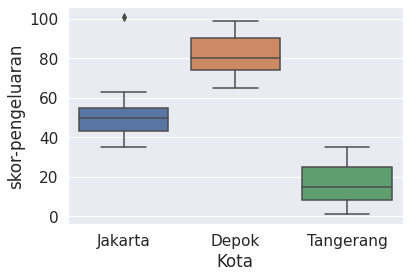

In [ ]:
#ingin dilihat apakah ada kecenderungan perbedaan pengeluaran customer di MixITUp dari kota.
sns.boxplot(y='skor-pengeluaran', x='Kota',data=df) #0-Belum dan #1-Menikah

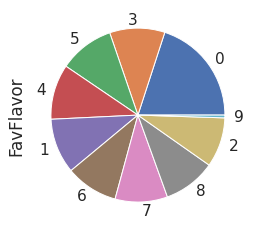

In [ ]:
#ingin dilihat rasa es krim yang paling diminati customer
plot = df.FavFlavor.value_counts().plot(kind='pie') #0-Vanilla ; 1-Strawberry ; 2-? ; 3-Cokelat ; 4-Blueberry ; 5-BubbleGum ; 6-Coconut ; 7-Caramel ; 8-Mix

Berdasarkan visualisasi di atas, perusahaan mungkin dapat menerapkan promo berupa **produk bundle**. Melalui promo ini perusahaan dapat menjual eskrim dengan **rasa yang kurang populer (9/Mix)** atau produk baru (jika ada) dengan menjadikan satu paket dengan **eskrim yang rasanya paling banyak dibeli (0/Vanilla)**. Hal ini mungkin dapat memikat pelanggan agar memesan dan mencoba banyak produk karena pelanggan akan merasa dapat menghemat lebih banyak ketika membeli beberapa produk sekaligus daripada membeli produk secara satuan.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

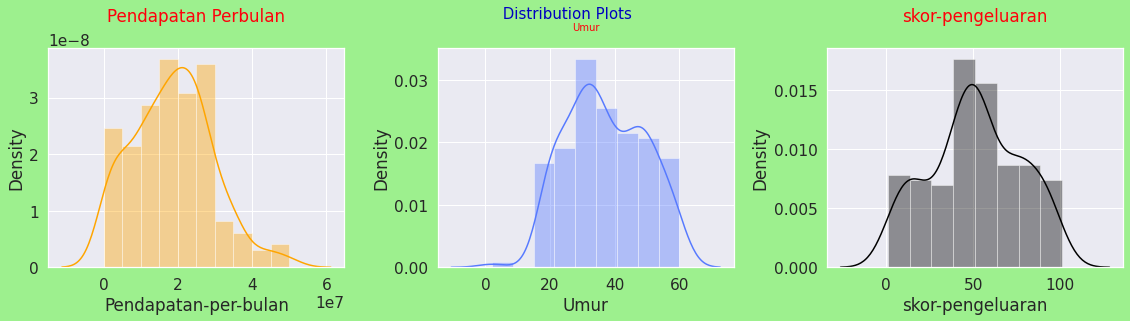

In [ ]:
#dist plot
plt.figure(figsize=(16,12),facecolor='#9DF08E')

# V1
plt.subplot(3,3,1)
plt.title('Pendapatan Perbulan\n', color='#FF000B')
sns.distplot(df['Pendapatan-per-bulan'], color='orange')

# V2
plt.subplot(3,3,2)
plt.title('Umur\n', color='#FF000B', size = 10)
sns.distplot(df['Umur'], color='#577AFF')

# V3
plt.subplot(3,3,3)
plt.title('skor-pengeluaran\n', color='#FF000B')
sns.distplot(df['skor-pengeluaran'], color='black')

plt.suptitle(' Distribution Plots\n', color='#0000C1', size = 15)
plt.tight_layout()

Terlihat dari grafik diatas, Pada grafik pendapatan per bulan distibusi normal, kemudian pada grafik umur distribusi berjalan tidak normal dan pada skor pengeluaran distribusi berjalan normal. Distribusi normal menandakan data yang dipakai baik untuk digunakan


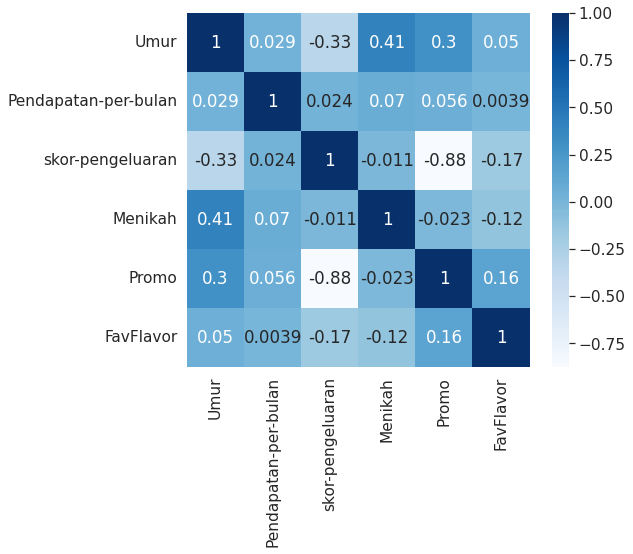

In [ ]:
##korelasi
cor =df.corr()
sns.set(font_scale=1.4)
plt.figure(figsize=(9,8))
sns.heatmap(cor, annot=True, cmap='Blues')
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi korelasi di atas, diperoleh hubungan yang tinggi antara Promo dan FavFlavor. Hal ini dapat diasumsikan bahwa semakin sering pembeli menggunakan promonya, maka akan berhubungan dengan rasa ice cream yang paling sering dipilih.

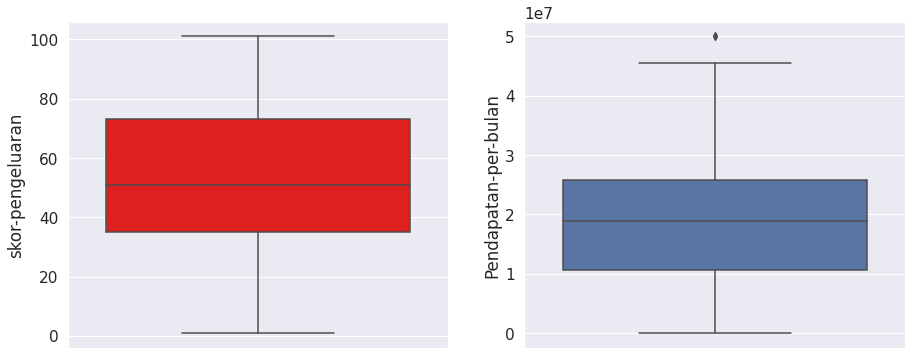

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["skor-pengeluaran"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Pendapatan-per-bulan"])
plt.show()

Terlihat dari boxplot di atas bahwa range skor pengeluaran lebih besar daripada pendapatan per bulan. Sehingga lebih baik diterapkan promo yang lebih baik.

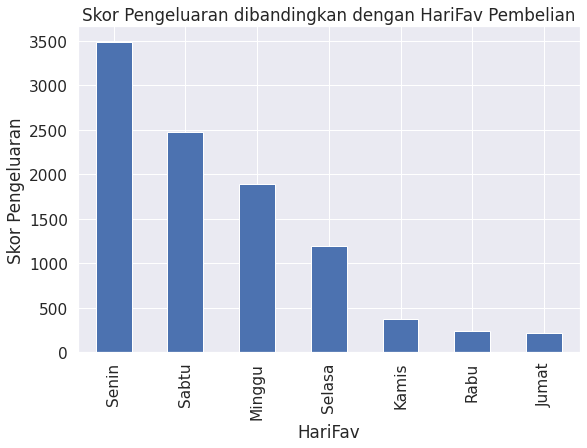

In [ ]:
|#Melihat skor pengeluaran dan Hari Favorit Pelanggan Membeli Es Krim
plt.figure(figsize=(9,6))
top_cities = df.groupby(['HariFav'])['skor-pengeluaran'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Skor Pengeluaran dibandingkan dengan HariFav Pembelian')
plt.xlabel('HariFav')
plt.ylabel('Skor Pengeluaran')
plt.show()

Berdasarkan hasil visualisasi di atas, dapat ditunjukkan bahwa banyak customer yang mengeluarkan uang lebih untuk membeli es krim di hari Senin. Hal ini menunjukkan bahwa perusahaan dapat menerapkan promo yang lebih banyak di hari tersebut agar customer dapat menggunakan kartu loyality programnya, dimana hal ini bertepatan dengan hari kerja khususnya bagi customer yang lebih banyak cenderung berusia mid 30 agar dapat menaikkan mood customer dan membuat mereka dapat mengunjungi MixITup kembali.

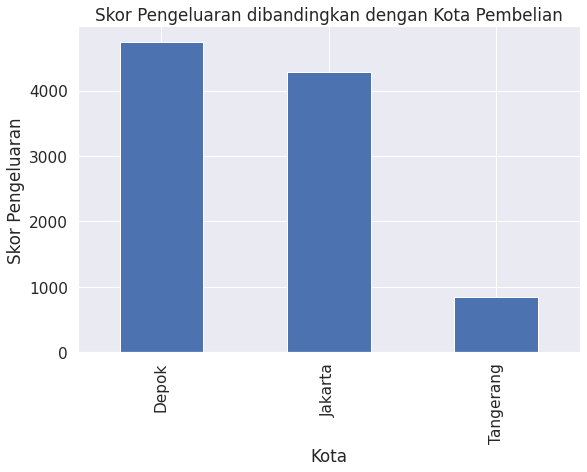

In [ ]:
#Melihat skor pengeluaran dan Kota Pelanggan Membeli Es Krim
plt.figure(figsize=(9,6))
top_cities = df.groupby(['Kota'])['skor-pengeluaran'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Skor Pengeluaran dibandingkan dengan Kota Pembelian')
plt.xlabel('Kota')
plt.ylabel('Skor Pengeluaran')
plt.show()

Berdasarkan hasil visualisasi di atas, dapat ditunjukkan bahwa banyak customer yang mengeluarkan biaya untuk membeli es krim dan mendaftarkan loyality programnya di Kota Depok. Hal ini menunjukkan bahwa perusahaan mungkin dapat membuka cabang baru di Kota Depok dan menerapkan promo untuk customer dengan member loyal agar semakin banyak customer yang mengunjungi MixITup.

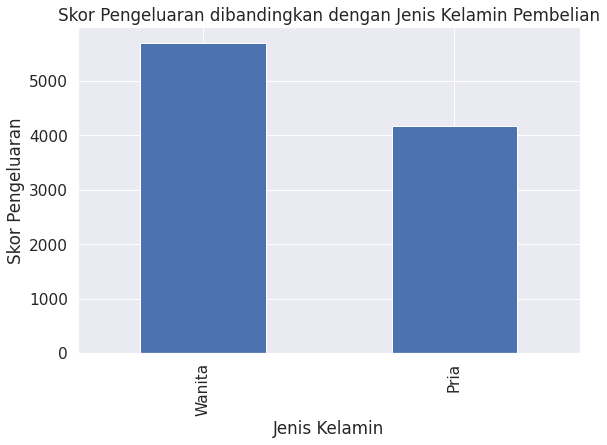

In [ ]:
#Melihat skor pengeluaran dan Jenis Kelamin Pelanggan Membeli Es Krim
plt.figure(figsize=(9,6))
top_cities = df.groupby(['Jenis Kelamin'])['skor-pengeluaran'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Skor Pengeluaran dibandingkan dengan Jenis Kelamin Pembelian')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Skor Pengeluaran')
plt.show()

Terlihat dari grafik pengeluaran dalam pembelian ice cream, pengeluaran wanita lebih banyak dibandingkan pengeluaran pria. Hal ini menunjukan bahwa untuk menaikkan penjualan, perusahaan dapat menerapkan promo yang lebih banyak khususnya untuk customer wanita sebagai contoh diadakan promo khusus untuk wanita yang sedang menstruasi dengan harapan dapat menaikkan mood customer.

#**Costumer Segmentation**

**Siapa saja customer MixItUp?**

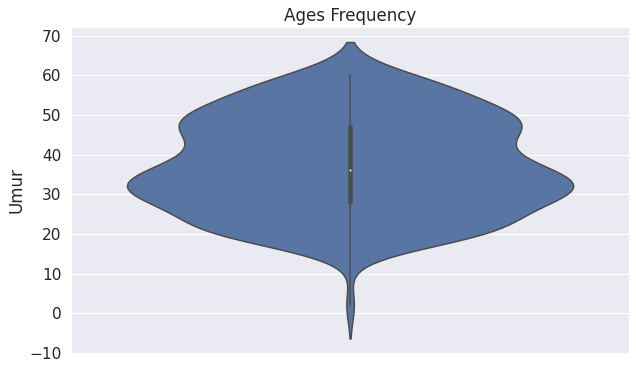

In [ ]:
#umur customer 
df["Umur"] = pd.to_numeric(df["Umur"])
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=df["Umur"])
plt.show()

Berdasarkan hasil visualisasi di atas, dapat ditunjukkan bahwa customer yang membeli es krim cenderung lebih banyak berusia sekitar 30 tahun.

**Bagaimana kondisi customer MixitUp?**

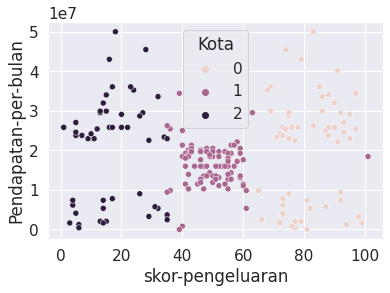

In [ ]:
#Checking Distribution
sns.scatterplot(data=df, y="Pendapatan-per-bulan",x="skor-pengeluaran",hue="Kota")
df = df.astype({"Pendapatan-per-bulan": int, "skor-pengeluaran": int}) #change dtype of columns into int

Berdasarkan hasil visualisasi diatas, terdapat tren bahwa Depok (60-100) memiliki skor pengeluaran (pembelanjaan) di MixItUp Paling banyak dan Tangerang paling sedikit dengan rentang (0-40)

Namun, terdapat outlier pada Kota Jakarta di mana memiliki skor pengeluaran tertinggi (100). Akan coba di cek kembali data tersebut di database

Clustering 

#**Executive Summary**

**Rekomendasi Untuk Data Engineer**


1.  Kualitas data sudah cukup baik, sebagian besar data memiliki input yang lengkap dan tidak ada baris yang tidak memiliki input sama sekali. 
2. Perusahaan MixItUp seharusnya segera merekrut seorang Data Engineer sehingga data dapat berupa csv agar mudah dalam pengelolaannya 
3. Pada variabel menikah, terdapat beberapa baris yang kosong (NaN) dan beberapa baris yang berisi (-). Hal ini bisa terjadi ambiguitas, baris yang kosong dan berisi (-) bisa diartikan bahwa pelanggan tersebut belum menikah atau tidak tahu apakah pelanggan tersebut sudah menikah. Disarankan kedepannya Data Engineer dapat konsisten saat menginput data. 
4. Pada variabel promo, terdapat beberapa baris yang kosong (NaN). Apabila pelanggan tersebut tidak pernah menggunakan promo, berilah input 0 untuk variabel promo.
5. Pada variabel pendapatan, sebaiknya tidak perlu ditulis mata uang di dalam inputnya. Nama kolom dapat ditulis sebagai Pendapatan (Rp) yang berarti pendapatan pelanggan dalam mata uang Rupiah.  
6. Pada saat nanti sudah membuka cabang di setiap kota, untuk dapat memaksimalkan usaha MixItUp sebaiknya lokasi pelanggan dibagi tiap cabangnya dibandingkan per kota. 
7. Pada variabel kota terdapat typo pada kota Jakarta. Data Engineer sebaiknya memperhatikan kembali input pada data.
8. Pada variabel umur terdapat typo pada umur 35, yaitu 35'. Data Engineer sebaiknya memperhatikan kembali input pada data.







**Rekomendasi Untuk Divisi Marketing**

1. Dari visualisasi yang didapatkan, terlihat bahwa mayoritas customer MixItUp berusia mid-30 